In [397]:
import numpy as np
import matplotlib.pyplot as plt

input_data = np.loadtxt('linear_train_data.csv',delimiter=",")
test_data = np.loadtxt('linear_test_data.csv',delimiter=",")

input_x = input_data[:,0]
input_y = input_data[:,1]

test_x = test_data[:,0]
test_y = test_data[:,1]

input_len = float(len(input_data))
test_len = float(len(test_data))

best_w = 0.0
best_b = 0.0
min_error = 1000.0

In [398]:
def compute_error(x, y, w, b, n):
    total_error = (y - w * x - b)**2
    total_error = np.sum(total_error)
#     print (total_error, n)
    return total_error/n

In [399]:
def update_best(w, b):
    global min_error
    global best_w
    global best_b
    test_error = compute_error(test_x, test_y, w, b, test_len)
    if test_error < min_error:
        min_error = test_error
        best_w = w
        best_b = b

In [400]:
def sgd(current_w, current_b, learing_rate):
    w_gd = 0.0
    b_gd = 0.0
    
    #update w,b with gradiention
    w_gd = -(2.0/input_len) * input_x * (input_y - current_w * input_x - current_b)
    b_gd = - (2.0/input_len) * (input_y - current_w * input_x - current_b)
    
    w_gd = np.sum(w_gd)
    b_gd = np.sum(b_gd)
    
    new_w = current_w - learing_rate * w_gd
    new_b = current_b - 10*learing_rate * b_gd
    
    return new_w, new_b
    

In [401]:
def optimizer(init_w, init_b, learning_rate, num_iter):
    w = init_w
    b = init_b
    
    for i in range(num_iter):
        w, b = sgd(w, b, learning_rate)
        update_best(w, b)
        if i % 10000 == 0:
            print ('iter {0}: w= {1}, b= {2}, train_loss: {3}, valid_loss: {4}' \
                   .format(i, w, b, compute_error(input_x, input_y, w, b, input_len), compute_error(test_x, test_y, w, b, test_len)));
    print(w, b)
    

In [402]:
def linear_regression():
    learning_rate = 1e-5
    num_iter = 100000
    
    #training
    optimizer(best_w, best_b, learning_rate, num_iter)
     
    #print final loss
    print ('final formula parmaters:\n w = {1}\n b={2}\n loss of end = {3} \n'.format(num_iter, best_w, \
                                                                                       best_b,compute_error(test_x, test_y, best_w, best_b, test_len)))

    #plot result
    plot_data()
    


In [403]:
def plot_data():

    #plottting
    y_predict = best_w * test_x + best_b
    plt.scatter(test_x, test_y)
    plt.plot(test_x, y_predict, 'kp-')
    plt.show()

iter 0: w= 0.1988356312425975, b= 0.030046498363985576, train_loss: 26318.998699004263, valid_loss: 26167.308387072826
iter 10000: w= 3.013303956548068, b= 1.1203727561545376, train_loss: 25.18651599362221, valid_loss: 25.008127106805915
iter 20000: w= 3.0072967261443457, b= 1.5190362153343855, train_loss: 25.02377212697439, valid_loss: 24.860846252058693
iter 30000: w= 3.0036939159936282, b= 1.7581328806734016, train_loss: 24.96523400209002, valid_loss: 24.811668381472792
iter 40000: w= 3.0015331463693986, b= 1.9015300595717366, train_loss: 24.944178142133147, valid_loss: 24.796257363718976
iter 50000: w= 3.000237234241456, b= 1.987531890198875, train_loss: 24.93660445849706, valid_loss: 24.79208032544474
iter 60000: w= 2.99946001661283, b= 2.039111111826811, train_loss: 24.933880243768385, valid_loss: 24.791397253841076
iter 70000: w= 2.998993883740684, b= 2.0700455243194655, train_loss: 24.932900357857573, valid_loss: 24.79164298053699
iter 80000: w= 2.9987143225901223, b= 2.0885983

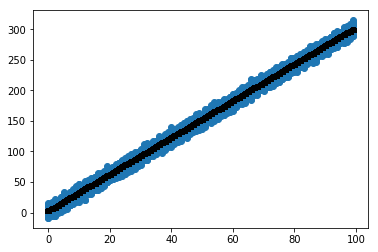

In [404]:
if __name__ =='__main__':
    linear_regression()